# Credit EDA Analysis

The credit Exploratory Data Analysis is helful is detecting the fraud/unpotential clients who are applying for loans and retaining the potential target clients to provide them with loads implying maximum profit and minimum loss for the Credit Company. The risk analytics approach enables the fraud investigators to understand the potential threats and minimum risk while the money is sanctioned to be lended to the customers. 

BUSINESS PROBLEM

In order to fascilitate the credit industry when they receive a loan application to identify
1. The applicant who is likely to pay. Hence, the credit company to approve their loans to maximize the company's profits. 
2. The applicant who is unlikely to pay is not approved to prevent the financial loss for the company.

Hence, based on the client who applies for the loan, the application is-
1. Approved- For potential clients
2. Cancelled- Application cancellation by the client during the approval process.
3. Refused- For clients with payment difficulties
4. Unused Offer- Cancelled loan in between the approval process.

# STEP 1: DATA LOADING AND IMPORTING MODULES

In [1]:
import warnings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_csv("eda-application_data.csv")
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [5]:
df2=pd.read_csv("eda-previous_application.csv")
df2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

# STEP 2: DATA INSPECTION

In [6]:
df1.shape

(1048575, 37)

In [7]:
df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [8]:
df1.info

<bound method DataFrame.info of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1048570     2230795      255000     Consumer loans    50978.475   
1048571     1823303      158245         Cash loans          NaN   
1048572     1730537      429268     Consumer loans     5793.120   
1048573     2100360      389043     Consumer loans     4775.355   
1048574     1283481      250078     Consumer loans     6617.925   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1            

In [9]:
df1.describe

<bound method NDFrame.describe of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1048570     2230795      255000     Consumer loans    50978.475   
1048571     1823303      158245         Cash loans          NaN   
1048572     1730537      429268     Consumer loans     5793.120   
1048573     2100360      389043     Consumer loans     4775.355   
1048574     1283481      250078     Consumer loans     6617.925   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1          

# STEP 3: DATA CLEANING (PREPROCESSING)

In [10]:
#Checking missing values in the application(df1) dataset
percentage_missing=(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
percentage_missing

RATE_INTEREST_PRIVILEGED       99.645137
RATE_INTEREST_PRIMARY          99.645137
RATE_DOWN_PAYMENT              53.348211
AMT_DOWN_PAYMENT               53.348211
NAME_TYPE_SUITE                49.127626
DAYS_TERMINATION               40.121880
NFLAG_INSURED_ON_APPROVAL      40.121880
DAYS_FIRST_DRAWING             40.121880
DAYS_FIRST_DUE                 40.121880
DAYS_LAST_DUE_1ST_VERSION      40.121880
DAYS_LAST_DUE                  40.121880
AMT_GOODS_PRICE                22.980235
AMT_ANNUITY                    22.221491
CNT_PAYMENT                    22.221205
PRODUCT_COMBINATION             0.021362
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_CREDIT                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [11]:
percentage_missing_2=(df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
percentage_missing_2

RATE_INTEREST_PRIVILEGED       99.645137
RATE_INTEREST_PRIMARY          99.645137
RATE_DOWN_PAYMENT              53.348211
AMT_DOWN_PAYMENT               53.348211
NAME_TYPE_SUITE                49.127626
DAYS_TERMINATION               40.121880
NFLAG_INSURED_ON_APPROVAL      40.121880
DAYS_FIRST_DRAWING             40.121880
DAYS_FIRST_DUE                 40.121880
DAYS_LAST_DUE_1ST_VERSION      40.121880
DAYS_LAST_DUE                  40.121880
AMT_GOODS_PRICE                22.980235
AMT_ANNUITY                    22.221491
CNT_PAYMENT                    22.221205
PRODUCT_COMBINATION             0.021362
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_CREDIT                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [12]:
df1.describe()

SK_ID_PREV    SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  1.048575e+06  1.048575e+06  815566.000000     1.048575e+06   
mean   1.922775e+06  2.784367e+05   15891.265151     1.742698e+05   
std    5.329366e+05  1.028569e+05   14745.557438     2.910789e+05   
min    1.000001e+06  1.000010e+05       0.000000     0.000000e+00   
25%    1.460642e+06  1.893860e+05    6301.350000     1.890000e+04   
50%    1.923419e+06  2.788100e+05   11250.000000     7.081650e+04   
75%    2.384448e+06  3.677445e+05   20523.003750     1.800000e+05   
max    2.845382e+06  4.562550e+05  418058.145000     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.048575e+06      4.891790e+05     8.076100e+05   
mean   1.950000e+05      6.700778e+03     2.262892e+05   
std    3.169407e+05      2.078570e+04     3.134490e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.427750e+04      0.000000e+00     5.058000e+04   
50%    8.025300e+04      1.624500e+03     1.115116e+05   
75%    2.152395e+05      7.749000e+03     2.295000e+05   
max    6.905160e+06      2.150100e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.048575e+06            1.048575e+06      489179.000000   
mean              1.248486e+01            9.964123e-01           0.079619   
std               3.333140e+00            5.979011e-02           0.107882   
min               0.000000e+00            0.000000e+00          -0.000014   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051062   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           0.989740   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               3721.000000   1.048575e+06      1.048575e+06   
mean   ...                  0.774922  -8.820381e+02      3.183904e+02   
std    ...                  0.099514   7.792649e+02      7.996734e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.303000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.830000e+02      4.000000e+00   
75%    ...                  0.852537  -2.810000e+02      8.500000e+01   
max    ...                  1.000000  -2.000000e+00      4.000000e+06   

         CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  815569.000000       627867.000000   627867.000000   
mean       15.995639       342387.346201    13833.802031   
std        14.508109        88595.441587    72460.126454   
min         0.000000        -2921.000000    -2892.000000   
25%         6.000000       365243.000000    -1626.000000   
50%        12.000000       365243.000000     -830.000000   
75%        24.000000       365243.000000     -410.000000   
max        84.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              627867.000000  627867.000000     627867.000000   
mean                33614.930898   76591.061435      81985.701661   
std                106643.960780  149653.053854     153298.887247   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1241.000000   -1313.000000      -1269.000000   
50%                  -361.000000    -537.000000       -498.000000   
75%                   128.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              627867.000000  
mean                    0.331530  
std                     0.470764  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

<BarContainer object of 37 artists>

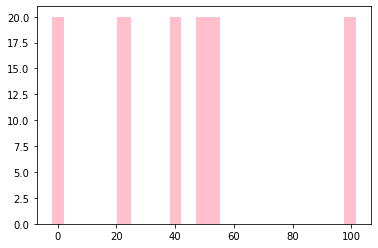

In [13]:
plt.bar(percentage_missing,color='pink', width=4, height=20)

In [14]:
#Dropping the columns with high missing percentage (>50%). 
null_column=df1.isnull().sum().sort_values(ascending=False)

In [15]:
null_column=null_column[null_column.values>(0.50*len(df1))]

In [16]:
#Here, RATE_INTEREST_PRIVILEGED, RATE_INTEREST_PRIMARY,RATE_DOWN_PAYMENT ,AMT_DOWN_PAYMENT columns are to be dropped due to its missing value percentage greater than 50%
len(null_column)

4

In [17]:
df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [18]:
null = (df1.isnull().sum()/len(df1)*100).sort_values(ascending = False).head(50)
null.head()

RATE_INTEREST_PRIVILEGED    99.645137
RATE_INTEREST_PRIMARY       99.645137
RATE_DOWN_PAYMENT           53.348211
AMT_DOWN_PAYMENT            53.348211
NAME_TYPE_SUITE             49.127626
dtype: float64

Note: 
1. RATE_INTEREST_PRIVILEGED       99.645137
RATE_INTEREST_PRIMARY          99.645137
RATE_DOWN_PAYMENT              53.348211
AMT_DOWN_PAYMENT               53.348211

2. RATE_INTEREST_PRIVILEGED	Interest rate normalized on previous credit
RATE_INTEREST_PRIMARY	Interest rate normalized on previous credit
RATE_DOWN_PAYMENT	Down payment rate normalized on previous credit
AMT_DOWN_PAYMENT	Down payment on the previous application

3. As checked the above 4 columns have null value percentage above 50%a are dropped as part of data cleaning step

In [19]:
df1.shape
1048575//2

524287

In [20]:
len(df1.columns[df1.isnull().sum()<524287])
df1.isnull().sum().sort_values(ascending=False).head(50)

RATE_INTEREST_PRIVILEGED       1044854
RATE_INTEREST_PRIMARY          1044854
RATE_DOWN_PAYMENT               559396
AMT_DOWN_PAYMENT                559396
NAME_TYPE_SUITE                 515140
DAYS_TERMINATION                420708
NFLAG_INSURED_ON_APPROVAL       420708
DAYS_FIRST_DRAWING              420708
DAYS_FIRST_DUE                  420708
DAYS_LAST_DUE_1ST_VERSION       420708
DAYS_LAST_DUE                   420708
AMT_GOODS_PRICE                 240965
AMT_ANNUITY                     233009
CNT_PAYMENT                     233006
PRODUCT_COMBINATION                224
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_CREDIT                           0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
AMT_APPLICATION                      0
NAME_PAYMENT_TYPE                    0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS     

In [21]:
#Dropping all the columns with greater than 50% null values
df1=df1[df1.columns[df1.isnull().sum()<524287]]

In [22]:
df1.shape
#The 4 columns with null values greater than 50% are dropped, so the total no of columns now becomes 33

(1048575, 33)

In [23]:
df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

    # STEP 4: Univariate Analysis

In [24]:
#Categorical columns
list(set(df1.columns)-set(df1.describe().columns))

['NAME_CLIENT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_TYPE_SUITE',
 'NAME_PORTFOLIO',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'CHANNEL_TYPE',
 'NAME_PAYMENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'PRODUCT_COMBINATION',
 'NAME_PRODUCT_TYPE',
 'NAME_YIELD_GROUP',
 'NAME_GOODS_CATEGORY',
 'CODE_REJECT_REASON']

In [25]:
#Numerical Columns
df1.describe().columns
list(set(df1.describe().columns))

['NFLAG_LAST_APPL_IN_DAY',
 'DAYS_LAST_DUE',
 'HOUR_APPR_PROCESS_START',
 'AMT_APPLICATION',
 'SELLERPLACE_AREA',
 'DAYS_FIRST_DRAWING',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'DAYS_DECISION',
 'SK_ID_PREV',
 'CNT_PAYMENT',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_FIRST_DUE',
 'AMT_GOODS_PRICE',
 'DAYS_LAST_DUE_1ST_VERSION']

In [26]:
nulls=df1.isnull().sum()
nulls[nulls>0]

AMT_ANNUITY                  233009
AMT_GOODS_PRICE              240965
NAME_TYPE_SUITE              515140
CNT_PAYMENT                  233006
PRODUCT_COMBINATION             224
DAYS_FIRST_DRAWING           420708
DAYS_FIRST_DUE               420708
DAYS_LAST_DUE_1ST_VERSION    420708
DAYS_LAST_DUE                420708
DAYS_TERMINATION             420708
NFLAG_INSURED_ON_APPROVAL    420708
dtype: int64

In [27]:
df1.count()

SK_ID_PREV                     1048575
SK_ID_CURR                     1048575
NAME_CONTRACT_TYPE             1048575
AMT_ANNUITY                     815566
AMT_APPLICATION                1048575
AMT_CREDIT                     1048575
AMT_GOODS_PRICE                 807610
WEEKDAY_APPR_PROCESS_START     1048575
HOUR_APPR_PROCESS_START        1048575
FLAG_LAST_APPL_PER_CONTRACT    1048575
NFLAG_LAST_APPL_IN_DAY         1048575
NAME_CASH_LOAN_PURPOSE         1048575
NAME_CONTRACT_STATUS           1048575
DAYS_DECISION                  1048575
NAME_PAYMENT_TYPE              1048575
CODE_REJECT_REASON             1048575
NAME_TYPE_SUITE                 533435
NAME_CLIENT_TYPE               1048575
NAME_GOODS_CATEGORY            1048575
NAME_PORTFOLIO                 1048575
NAME_PRODUCT_TYPE              1048575
CHANNEL_TYPE                   1048575
SELLERPLACE_AREA               1048575
NAME_SELLER_INDUSTRY           1048575
CNT_PAYMENT                     815569
NAME_YIELD_GROUP         

In [28]:
len(df1)

1048575

In [29]:
#To extract the % of present values for the given columns
df1_missing=df1.count()/len(df1)
df1_missing

SK_ID_PREV                     1.000000
SK_ID_CURR                     1.000000
NAME_CONTRACT_TYPE             1.000000
AMT_ANNUITY                    0.777785
AMT_APPLICATION                1.000000
AMT_CREDIT                     1.000000
AMT_GOODS_PRICE                0.770198
WEEKDAY_APPR_PROCESS_START     1.000000
HOUR_APPR_PROCESS_START        1.000000
FLAG_LAST_APPL_PER_CONTRACT    1.000000
NFLAG_LAST_APPL_IN_DAY         1.000000
NAME_CASH_LOAN_PURPOSE         1.000000
NAME_CONTRACT_STATUS           1.000000
DAYS_DECISION                  1.000000
NAME_PAYMENT_TYPE              1.000000
CODE_REJECT_REASON             1.000000
NAME_TYPE_SUITE                0.508724
NAME_CLIENT_TYPE               1.000000
NAME_GOODS_CATEGORY            1.000000
NAME_PORTFOLIO                 1.000000
NAME_PRODUCT_TYPE              1.000000
CHANNEL_TYPE                   1.000000
SELLERPLACE_AREA               1.000000
NAME_SELLER_INDUSTRY           1.000000
CNT_PAYMENT                    0.777788


In [30]:
#To extract the missing values
df1_missing=(1-df1_missing)*100
df1_missing

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.221491
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                22.980235
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.127626
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [31]:
df1_missing.sort_values(ascending=False).head(60)

NAME_TYPE_SUITE                49.127626
DAYS_FIRST_DUE                 40.121880
DAYS_TERMINATION               40.121880
DAYS_FIRST_DRAWING             40.121880
NFLAG_INSURED_ON_APPROVAL      40.121880
DAYS_LAST_DUE_1ST_VERSION      40.121880
DAYS_LAST_DUE                  40.121880
AMT_GOODS_PRICE                22.980235
AMT_ANNUITY                    22.221491
CNT_PAYMENT                    22.221205
PRODUCT_COMBINATION             0.021362
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE

In [32]:
df1['NAME_TYPE_SUITE'].head()

0                NaN
1      Unaccompanied
2    Spouse, partner
3                NaN
4                NaN
Name: NAME_TYPE_SUITE, dtype: object

In [33]:
df1['HOUR_APPR_PROCESS_START'].mean()

12.484856114250292

In [34]:
df1['HOUR_APPR_PROCESS_START'].describe()

count    1.048575e+06
mean     1.248486e+01
std      3.333140e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64

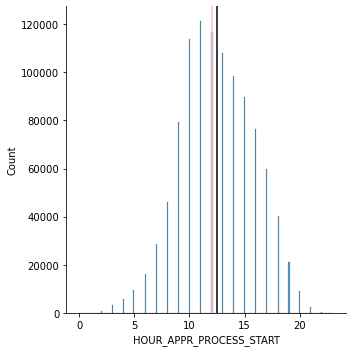

In [35]:
sns.displot(df1['HOUR_APPR_PROCESS_START'])
plt.axvline(df1['HOUR_APPR_PROCESS_START'].mean(),color='black')
plt.axvline(df1['HOUR_APPR_PROCESS_START'].median(),color='pink')
plt.show()

For numerical Columns
#If mean and median are almost at same place, substituting missing value by mean.
#However if the mean and median are not at same place, substitute the missing values by median.

For Categorical Columns
Fill missing values by mode

In [36]:
df1['HOUR_APPR_PROCESS_START'].fillna(df1['HOUR_APPR_PROCESS_START'].mean(),inplace=True)

In [37]:
df1['HOUR_APPR_PROCESS_START'].isna().sum()

0

In [38]:
df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].mean(),inplace=True)
df1['AMT_GOODS_PRICE'].isna().sum()

0

In [39]:
df1.isna().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                515140
DAYS_FIRST_DUE                 420708
DAYS_TERMINATION               420708
DAYS_FIRST_DRAWING             420708
NFLAG_INSURED_ON_APPROVAL      420708
DAYS_LAST_DUE_1ST_VERSION      420708
DAYS_LAST_DUE                  420708
AMT_ANNUITY                    233009
CNT_PAYMENT                    233006
PRODUCT_COMBINATION               224
NAME_CASH_LOAN_PURPOSE              0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
DAYS_DECISION                       0
NAME_CONTRACT_STATUS                0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOL

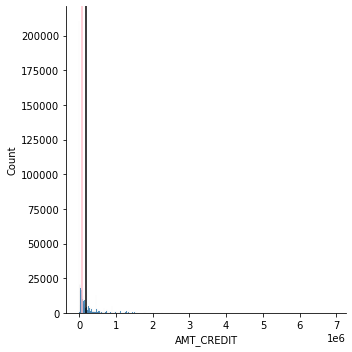

In [40]:
sns.displot(df1['AMT_CREDIT'])
plt.axvline(df1['AMT_CREDIT'].mean(),color='black')
plt.axvline(df1['AMT_CREDIT'].median(),color='pink')
plt.show()

In [41]:
df1['AMT_CREDIT'].fillna(df1['AMT_CREDIT'].mean(),inplace=True)

In [42]:
df1['AMT_CREDIT'].isna().sum()

0

In [43]:
df1.isna().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                515140
DAYS_FIRST_DUE                 420708
DAYS_TERMINATION               420708
DAYS_FIRST_DRAWING             420708
NFLAG_INSURED_ON_APPROVAL      420708
DAYS_LAST_DUE_1ST_VERSION      420708
DAYS_LAST_DUE                  420708
AMT_ANNUITY                    233009
CNT_PAYMENT                    233006
PRODUCT_COMBINATION               224
NAME_CASH_LOAN_PURPOSE              0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
DAYS_DECISION                       0
NAME_CONTRACT_STATUS                0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOL

In [44]:
df1['NFLAG_LAST_APPL_IN_DAY'].fillna(df1['NFLAG_LAST_APPL_IN_DAY'].mean(),inplace=True)
df1['AMT_APPLICATION'].fillna(df1['AMT_APPLICATION'].mean(),inplace=True)
df1['CNT_PAYMENT'].fillna(df1['CNT_PAYMENT'].mean(),inplace=True)
df1['DAYS_FIRST_DUE'].fillna(df1['DAYS_FIRST_DUE'].mean(),inplace=True)
df1['DAYS_DECISION'].fillna(df1['DAYS_DECISION'].mean(),inplace=True)
df1['AMT_GOODS_PRICE'].fillna(df1['AMT_GOODS_PRICE'].mean(),inplace=True)
df1['DAYS_FIRST_DRAWING'].fillna(df1['DAYS_FIRST_DRAWING'].mean(),inplace=True)
df1['SK_ID_CURR'].fillna(df1['SK_ID_CURR'].mean(),inplace=True)
df1['SELLERPLACE_AREA'].fillna(df1['SELLERPLACE_AREA'].mean(),inplace=True)
df1['DAYS_LAST_DUE_1ST_VERSION'].fillna(df1['DAYS_LAST_DUE_1ST_VERSION'].mean(),inplace=True)
df1['SK_ID_PREV'].fillna(df1['SK_ID_PREV'].mean(),inplace=True)
df1['DAYS_LAST_DUE'].fillna(df1['DAYS_LAST_DUE'].mean(),inplace=True)
df1['DAYS_TERMINATION'].fillna(df1['DAYS_TERMINATION'].mean(),inplace=True)
df1['NFLAG_INSURED_ON_APPROVAL'].fillna(df1['NFLAG_INSURED_ON_APPROVAL'].mean(),inplace=True)
df1['AMT_ANNUITY'].fillna(df1['AMT_ANNUITY'].mean(),inplace=True)


In [45]:
df1['HOUR_APPR_PROCESS_START'].isna().sum()

0

In [46]:
df1['AMT_CREDIT'].isna().sum()

0

In [47]:
df1['NFLAG_LAST_APPL_IN_DAY'].isna().sum()

0

In [48]:
df1['AMT_APPLICATION'].isna().sum()

0

In [49]:
df1['CNT_PAYMENT'].isna().sum()

0

In [50]:
df1['DAYS_FIRST_DUE'].isna().sum()

0

In [51]:
df1['DAYS_DECISION'].isna().sum()

0

In [52]:
df1['AMT_GOODS_PRICE'].isna().sum()

0

In [53]:
df1['DAYS_FIRST_DRAWING'].isna().sum()

0

In [54]:
df1['SK_ID_CURR'].isna().sum()

0

In [55]:
df1['DAYS_LAST_DUE_1ST_VERSION'].isna().sum()

0

In [56]:
df1['SK_ID_PREV'].isna().sum()

0

In [57]:
df1['DAYS_LAST_DUE'].isna().sum()

0

In [58]:
df1['DAYS_TERMINATION'].isna().sum()

0

In [59]:
df1['NFLAG_INSURED_ON_APPROVAL'].isna().sum()

0

In [60]:
df1['AMT_ANNUITY'].isna().sum()

0

In [61]:
df1.isna().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                515140
PRODUCT_COMBINATION               224
WEEKDAY_APPR_PROCESS_START          0
DAYS_DECISION                       0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
AMT_GOODS_PRICE                     0
CODE_REJECT_REASON                  0
AMT_CREDIT                          0
AMT_APPLICATION                     0
AMT_ANNUITY                         0
NAME_CONTRACT_TYPE                  0
SK_ID_CURR                          0
NAME_PAYMENT_TYPE                   0
NFLAG_INSURED_ON_APPROVAL           0
DAYS_TERMINATION                    0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT 

In [62]:
df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].mode(),inplace=True)

In [63]:
df1['PRODUCT_COMBINATION'].fillna(df1['PRODUCT_COMBINATION'].mode(),inplace=True)

In [64]:
df1_missing.sort_values(ascending=False)

NAME_TYPE_SUITE                49.127626
DAYS_FIRST_DUE                 40.121880
DAYS_TERMINATION               40.121880
DAYS_FIRST_DRAWING             40.121880
NFLAG_INSURED_ON_APPROVAL      40.121880
DAYS_LAST_DUE_1ST_VERSION      40.121880
DAYS_LAST_DUE                  40.121880
AMT_GOODS_PRICE                22.980235
AMT_ANNUITY                    22.221491
CNT_PAYMENT                    22.221205
PRODUCT_COMBINATION             0.021362
NAME_CASH_LOAN_PURPOSE          0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
DAYS_DECISION                   0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE

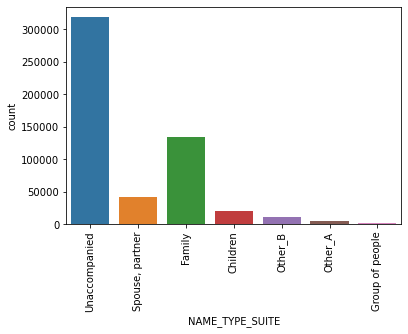

In [65]:
sns.countplot(x="NAME_TYPE_SUITE", data=df1)
plt.xticks(rotation=90);

#NAME_TYPE_SUITE is a categorical column and can be replaced only with the mode value
#Here mode is Unaccompanied. Filling 49% of this categorical column with Unaccompanied is certainly not a fair idea.
#Therefore, categorical columns will be left as it is. The same is applied for other categorical columns with Null values as well

In [66]:
df1.isna().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                515139
PRODUCT_COMBINATION               224
WEEKDAY_APPR_PROCESS_START          0
DAYS_DECISION                       0
NAME_CONTRACT_STATUS                0
NAME_CASH_LOAN_PURPOSE              0
NFLAG_LAST_APPL_IN_DAY              0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
AMT_GOODS_PRICE                     0
CODE_REJECT_REASON                  0
AMT_CREDIT                          0
AMT_APPLICATION                     0
AMT_ANNUITY                         0
NAME_CONTRACT_TYPE                  0
SK_ID_CURR                          0
NAME_PAYMENT_TYPE                   0
NFLAG_INSURED_ON_APPROVAL           0
DAYS_TERMINATION                    0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT 

In [67]:
df1['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      318731
Family             134396
Spouse, partner     42160
Children            19957
Other_B             11084
Other_A              5707
Group of people      1401
Name: NAME_TYPE_SUITE, dtype: int64

In [68]:
df1["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
dtype: object

In [69]:
#The mode value is present at index 0
df1["NAME_TYPE_SUITE"].mode()[0]

'Unaccompanied'

In [70]:
df1["NAME_TYPE_SUITE"]=df1["NAME_TYPE_SUITE"].fillna(df1["NAME_TYPE_SUITE"].mode()[0], inplace=True)

In [71]:
df1.isna().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                1048575
PRODUCT_COMBINATION                224
WEEKDAY_APPR_PROCESS_START           0
DAYS_DECISION                        0
NAME_CONTRACT_STATUS                 0
NAME_CASH_LOAN_PURPOSE               0
NFLAG_LAST_APPL_IN_DAY               0
FLAG_LAST_APPL_PER_CONTRACT          0
HOUR_APPR_PROCESS_START              0
AMT_GOODS_PRICE                      0
CODE_REJECT_REASON                   0
AMT_CREDIT                           0
AMT_APPLICATION                      0
AMT_ANNUITY                          0
NAME_CONTRACT_TYPE                   0
SK_ID_CURR                           0
NAME_PAYMENT_TYPE                    0
NFLAG_INSURED_ON_APPROVAL            0
DAYS_TERMINATION                     0
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY     

In [72]:
df1["PRODUCT_COMBINATION"].mode()
df1["PRODUCT_COMBINATION"].mode()[0]

'Cash'

In [73]:
df1["PRODUCT_COMBINATION"]=df1["PRODUCT_COMBINATION"].fillna(df1["PRODUCT_COMBINATION"].mode()[0], inplace=True)

In [74]:
df1.isna().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                1048575
PRODUCT_COMBINATION            1048575
WEEKDAY_APPR_PROCESS_START           0
DAYS_DECISION                        0
NAME_CONTRACT_STATUS                 0
NAME_CASH_LOAN_PURPOSE               0
NFLAG_LAST_APPL_IN_DAY               0
FLAG_LAST_APPL_PER_CONTRACT          0
HOUR_APPR_PROCESS_START              0
AMT_GOODS_PRICE                      0
CODE_REJECT_REASON                   0
AMT_CREDIT                           0
AMT_APPLICATION                      0
AMT_ANNUITY                          0
NAME_CONTRACT_TYPE                   0
SK_ID_CURR                           0
NAME_PAYMENT_TYPE                    0
NFLAG_INSURED_ON_APPROVAL            0
DAYS_TERMINATION                     0
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY     

In [75]:
df1.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                          0
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_GOODS_PRICE                      0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                1048575
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY                 0
CNT_PAYMENT                          0
NAME_YIELD_GROUP         

In [76]:
#categortical Columns
cols=list(set(df1.columns)-set(df1.describe().columns))
cols

['NAME_CLIENT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_TYPE_SUITE',
 'NAME_PORTFOLIO',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'CHANNEL_TYPE',
 'NAME_PAYMENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'PRODUCT_COMBINATION',
 'NAME_PRODUCT_TYPE',
 'NAME_YIELD_GROUP',
 'NAME_GOODS_CATEGORY',
 'CODE_REJECT_REASON']

In [77]:
df1[cols]=df1[cols].fillna(df1.mode().iloc[0])

In [78]:
df1.isnull().sum().sort_values(ascending=False)

NAME_TYPE_SUITE                1048575
PRODUCT_COMBINATION            1048575
WEEKDAY_APPR_PROCESS_START           0
DAYS_DECISION                        0
NAME_CONTRACT_STATUS                 0
NAME_CASH_LOAN_PURPOSE               0
NFLAG_LAST_APPL_IN_DAY               0
FLAG_LAST_APPL_PER_CONTRACT          0
HOUR_APPR_PROCESS_START              0
AMT_GOODS_PRICE                      0
CODE_REJECT_REASON                   0
AMT_CREDIT                           0
AMT_APPLICATION                      0
AMT_ANNUITY                          0
NAME_CONTRACT_TYPE                   0
SK_ID_CURR                           0
NAME_PAYMENT_TYPE                    0
NFLAG_INSURED_ON_APPROVAL            0
DAYS_TERMINATION                     0
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA                     0
NAME_SELLER_INDUSTRY     

In [79]:
df1.NAME_TYPE_SUITE.dtype

dtype('float64')

In [80]:
df1.PRODUCT_COMBINATION.dtype

dtype('float64')

# DataSet is Clean

In [81]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                           Y  ...   
1                       11                           Y  ...   
2                       11                           Y  ...   
3                        7                           Y  ...   
4                        9                           Y  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION  \
0          Connectivity        12.0           middle                  NaN   
1                   XNA        36.0       low_action                  NaN   
2                   XNA        12.0             high                  NaN   
3                   XNA        12.0           middle                  NaN   
4                   XNA        24.0             high                  NaN   

  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0      365243.000000     -42.000000                 300.000000     -42.000000   
1      365243.000000    -134.000000                 916.000000  365243.000000   
2      365243.000000    -271.000000                  59.000000  365243.000000   
3      365243.000000    -482.000000                -152.000000    -182.000000   
4      342387.346201   13833.802031               33614.930898   76591.061435   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0       -37.000000                   0.00000  
1    365243.000000                   1.00000  
2    365243.000000                   1.00000  
3      -177.000000                   1.00000  
4     81985.701661                   0.33153  

[5 rows x 33 columns]

####### As we can see the DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION have negative values although these are days columns which is not valid. There below it its data cleaning/preprocessing-

In [82]:
df1[['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION' ]]

DAYS_DECISION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0                  -73       365243.000000      -42.000000   
1                 -164       365243.000000     -134.000000   
2                 -301       365243.000000     -271.000000   
3                 -512       365243.000000     -482.000000   
4                 -781       342387.346201    13833.802031   
...                ...                 ...             ...   
1048570           -261       342387.346201    13833.802031   
1048571           -344       342387.346201    13833.802031   
1048572          -2335       365243.000000    -2304.000000   
1048573          -2883       365243.000000    -2852.000000   
1048574          -2544       365243.000000    -2513.000000   

         DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  
0                       300.000000     -42.000000        -37.000000  
1                       916.000000  365243.000000     365243.000000  
2                        59.000000  365243.000000     365243.000000  
3                      -152.000000    -182.000000       -177.000000  
4                     33614.930898   76591.061435      81985.701661  
...                            ...            ...               ...  
1048570               33614.930898   76591.061435      81985.701661  
1048571               33614.930898   76591.061435      81985.701661  
1048572               -2094.000000   -2124.000000      -2118.000000  
1048573               -2642.000000   -2702.000000      -2616.000000  
1048574               -2423.000000   -2423.000000      -2420.000000  

[1048575 rows x 6 columns]

In [83]:
days_column=[i for i in df1 if i.startswith('DAYS')]
days_column

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [84]:
df1[days_column]=abs(df1[days_column])
#The abs function give the absolute i.e positive values for all the negative value containg tuples.
#The column DAYS_FIRST_DRAWING though contains the positive values but starting with days will be included and returns positive same values

In [85]:
print(df1['DAYS_DECISION'].unique())
print(df1['DAYS_FIRST_DRAWING'].unique())
print(df1['DAYS_FIRST_DUE'].unique())
print(df1['DAYS_LAST_DUE_1ST_VERSION'].unique())
print(df1['DAYS_LAST_DUE'].unique())
print(df1['DAYS_TERMINATION'].unique())

[  73.  164.  301. ... 2262. 1967. 2389.]
[3.65243000e+05 3.42387346e+05 2.77000000e+02 ... 1.88900000e+03
 1.41000000e+03 1.87200000e+03]
[  42.  134.  271. ... 2842. 1774. 2892.]
[ 300.  916.   59. ... 2801. 2776. 2757.]
[4.20000e+01 3.65243e+05 1.82000e+02 ... 2.83000e+03 2.86900e+03
 2.87800e+03]
[3.70000e+01 3.65243e+05 1.77000e+02 ... 2.74400e+03 2.83200e+03
 2.83300e+03]


In [86]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                           Y  ...   
1                       11                           Y  ...   
2                       11                           Y  ...   
3                        7                           Y  ...   
4                        9                           Y  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION  \
0          Connectivity        12.0           middle                  NaN   
1                   XNA        36.0       low_action                  NaN   
2                   XNA        12.0             high                  NaN   
3                   XNA        12.0           middle                  NaN   
4                   XNA        24.0             high                  NaN   

  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0      365243.000000      42.000000                 300.000000      42.000000   
1      365243.000000     134.000000                 916.000000  365243.000000   
2      365243.000000     271.000000                  59.000000  365243.000000   
3      365243.000000     482.000000                 152.000000     182.000000   
4      342387.346201   13833.802031               33614.930898   76591.061435   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0        37.000000                   0.00000  
1    365243.000000                   1.00000  
2    365243.000000                   1.00000  
3       177.000000                   1.00000  
4     81985.701661                   0.33153  

[5 rows x 33 columns]

#### Now FLAG_LAST_APPL_PER_CONTRACT containts Y/N data vlues so substituting with 0/1 for better analysis

In [87]:
df1['FLAG_LAST_APPL_PER_CONTRACT'] = np.where(df1['FLAG_LAST_APPL_PER_CONTRACT']=='Y', 1 , 0) 

In [88]:
df1[['FLAG_LAST_APPL_PER_CONTRACT']].head()

FLAG_LAST_APPL_PER_CONTRACT
0                            1
1                            1
2                            1
3                            1
4                            1

#### Now, as we know NAME_SELLER_INDUSTRY columns contain XNAN values which is NaN values only. So, cleaning this column as well.

In [89]:
df1.NAME_SELLER_INDUSTRY.value_counts()

XNA                     533625
Consumer electronics    252348
Connectivity            174053
Furniture                36523
Construction             18743
Clothing                 15035
Industry                 12276
Auto technology           3188
Jewelry                   1736
MLM partners               742
Tourism                    306
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [90]:
df1.loc[df1.NAME_SELLER_INDUSTRY == '252348','NAME_SELLER_INDUSTRY'] = 'XNA'

In [91]:
df1.loc[df1.NAME_SELLER_INDUSTRY == 'XNA','NAME_SELLER_INDUSTRY'] = 'Consumer electronics'

In [92]:
df1.NAME_SELLER_INDUSTRY.value_counts()

Consumer electronics    785973
Connectivity            174053
Furniture                36523
Construction             18743
Clothing                 15035
Industry                 12276
Auto technology           3188
Jewelry                   1736
MLM partners               742
Tourism                    306
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [93]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                            1  ...   
1                       11                            1  ...   
2                       11                            1  ...   
3                        7                            1  ...   
4                        9                            1  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION  \
0          Connectivity        12.0           middle                  NaN   
1  Consumer electronics        36.0       low_action                  NaN   
2  Consumer electronics        12.0             high                  NaN   
3  Consumer electronics        12.0           middle                  NaN   
4  Consumer electronics        24.0             high                  NaN   

  DAYS_FIRST_DRAWING DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
0      365243.000000      42.000000                 300.000000      42.000000   
1      365243.000000     134.000000                 916.000000  365243.000000   
2      365243.000000     271.000000                  59.000000  365243.000000   
3      365243.000000     482.000000                 152.000000     182.000000   
4      342387.346201   13833.802031               33614.930898   76591.061435   

  DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
0        37.000000                   0.00000  
1    365243.000000                   1.00000  
2    365243.000000                   1.00000  
3       177.000000                   1.00000  
4     81985.701661                   0.33153  

[5 rows x 33 columns]

# Performing the binning process for the AMT_INCOME_TOTAL which is present in the column_description- clarification asked to the Upgrad Buddy

In [94]:
df1.PRODUCT_COMBINATION.value_counts()

Series([], Name: PRODUCT_COMBINATION, dtype: int64)

In [95]:
#df1['AMT_INCOME_TOTAL'] = pd.qcut(df1.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) df1['AMT_INCOME_TOTAL'].head(11)

In [96]:
df1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [97]:
temp=df1[['NAME_TYPE_SUITE']]
df1.NAME_TYPE_SUITE.unique()

array([nan])

In [98]:
temp=df1[['PRODUCT_COMBINATION']]
df1.PRODUCT_COMBINATION.unique()

array([nan])

In [99]:
df1.drop(['NAME_TYPE_SUITE','PRODUCT_COMBINATION'], inplace=True, axis=1)

In [100]:
df1.isnull().sum().sort_values(ascending=False)


NFLAG_INSURED_ON_APPROVAL      0
NAME_PAYMENT_TYPE              0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
CODE_REJECT_REASON             0
DAYS_TERMINATION               0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_DUE                  0
SK_ID_PREV

# Step 4: Data Analysis

In [101]:
#Considering the Past history of the applied clients, we understand that there are
#Repeater, New, Refreshed and XNA clinets
#Here first the XNA clients are substituted with the mode value that is Repeater considering they are the maximum in the dataset and XNA are the null values

df1['NAME_CLIENT_TYPE'].value_counts()

Repeater     771957
New          189990
Refreshed     85411
XNA            1217
Name: NAME_CLIENT_TYPE, dtype: int64

In [102]:
df1.loc[df1.NAME_CLIENT_TYPE == 'XNA','NAME_CLIENT_TYPE'] = 'Repeater'

In [103]:
df1['NAME_CLIENT_TYPE'].value_counts()

Repeater     773174
New          189990
Refreshed     85411
Name: NAME_CLIENT_TYPE, dtype: int64

In [104]:
df1.loc[df1.NAME_CLIENT_TYPE == 'Repeater','NAME_CLIENT_TYPE'] = 0

In [105]:
df1['NAME_CLIENT_TYPE'].value_counts()

0            773174
New          189990
Refreshed     85411
Name: NAME_CLIENT_TYPE, dtype: int64

In [106]:
#Now, CLIENT_TYPE are those clients which are new and refreshed while the Repeaters can be ignored
#So, The New and the Refreshed clients are recognised as 1 while repeaters are 0

df1.loc[df1.NAME_CLIENT_TYPE == 'New','NAME_CLIENT_TYPE'] = 1

In [107]:
df1.loc[df1.NAME_CLIENT_TYPE == 'Refreshed','NAME_CLIENT_TYPE'] = 1

In [108]:
df1['NAME_CLIENT_TYPE'].value_counts()

0    773174
1    275401
Name: NAME_CLIENT_TYPE, dtype: int64

In [109]:
# OBSERVATION 1- 26% of the given dataset are target audience and the 73% are the defaulters/to be ignored to maximize profit and minimize risk factor.
df1.NAME_CLIENT_TYPE.value_counts(normalize=True)*100

0    73.735689
1    26.264311
Name: NAME_CLIENT_TYPE, dtype: float64

In [110]:
#275401 are promising clients
(df1["NAME_CLIENT_TYPE"]==1).sum()

275401

In [111]:
#773174 are clients with payment difficulties
(df1["NAME_CLIENT_TYPE"]==0).sum()

773174

In [112]:
# Check for imbalance
#yes the data is imbalanced considering a huge number of difference between the promising and the defaulter clients
#In this case it is 497773
df1.NAME_CLIENT_TYPE.value_counts()

0    773174
1    275401
Name: NAME_CLIENT_TYPE, dtype: int64

In [113]:
773174-275401

497773

In [114]:
#Ratio of imbalance
(df1["NAME_CLIENT_TYPE"]==0).sum()/(df1["NAME_CLIENT_TYPE"]==1).sum()

2.8074480484820317

In [115]:
#Analyzing the categorical data with reference to the 1 and 0 promising and rejecting clients for patterns and existence of relationship
df1_0=df1.loc[df1.NAME_CLIENT_TYPE==0]
df1_1=df1.loc[df1.NAME_CLIENT_TYPE==1]

In [116]:
#Fetching the categorical columns
cat_cols=list(set(df1.columns)-set(df1.describe().columns))
cat_cols

['NAME_CLIENT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_PAYMENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_PRODUCT_TYPE',
 'NAME_YIELD_GROUP',
 'NAME_GOODS_CATEGORY',
 'CODE_REJECT_REASON']

In [117]:
#Fetching numerical columns
num_cols=df1.describe().columns
num_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [118]:
df1_categorical=df1.select_dtypes(include=['object']).columns
df1_categorical

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'],
      dtype='object')

# STEP 5: UNIVARIATE ANALYSIS

In [119]:
def plotting(df1,df1_0,df1_1,column):
    df1=df1
    df1_0=df1_0
    df1_1=df1_1
    col=column
    
    fig=plt.figure(figsize=(13,10))
    
    ax1=plt.subplot(221)#Plotting 2 rows and 2 columns & plotting a pie chart
    df1[col].value_counts().plot.pie(autopct="%1.0f%%",ax=ax1)
    #df.plot.bar(ax=ax1)
    plt.title("Plotting Data for the Column:"+column)
    
    ax2=plt.subplot(222) #Plotting a Count plot
    sns.countplot(x=column, hue='NAME_CLIENT_TYPE', data=df1,ax=ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting Data for Promising/Repeated Defaulters in terms of Categorical Data')
    
    ax3=plt.subplot(223) #Bar Plot
    df=pd.DataFrame()
    df['0']=((df1_0[col].value_counts())/len(df1_0))
    df['1']=((df1_1[col].value_counts())/len(df1_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')
    
    fig.tight_layout()#For equal distribution
    
    plt.show()
    

Plotting NAME_CONTRACT_TYPE


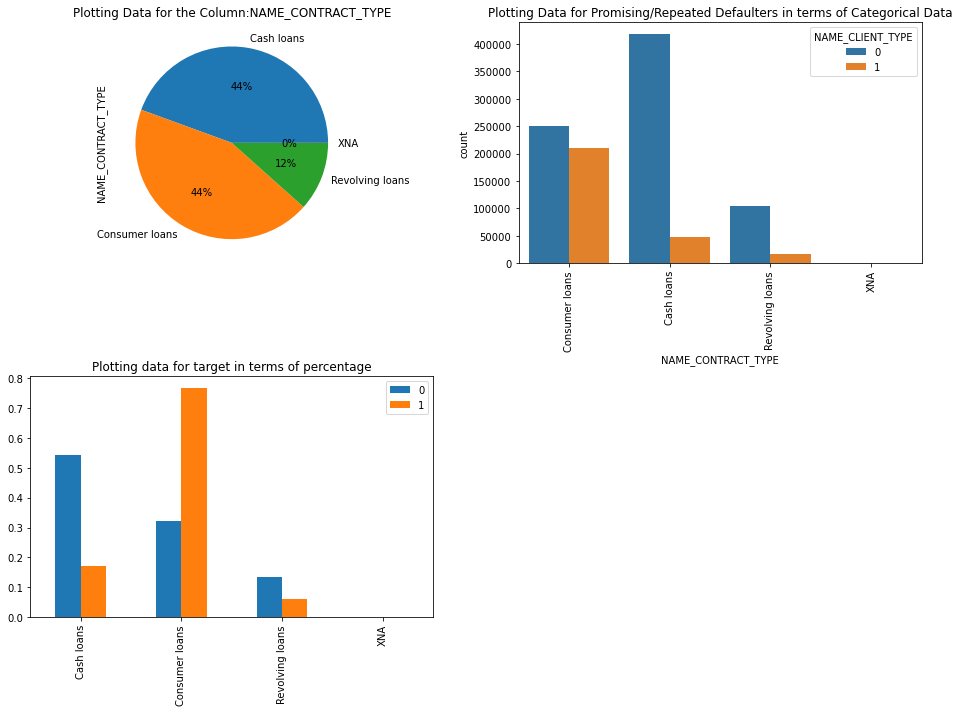

Plotting WEEKDAY_APPR_PROCESS_START


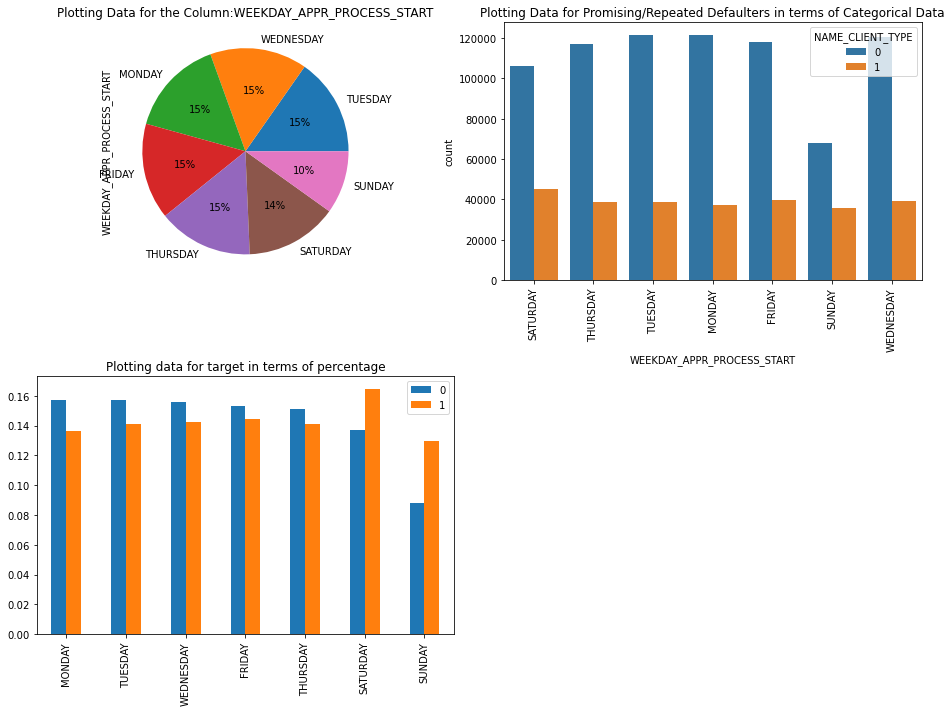

Plotting NAME_CASH_LOAN_PURPOSE


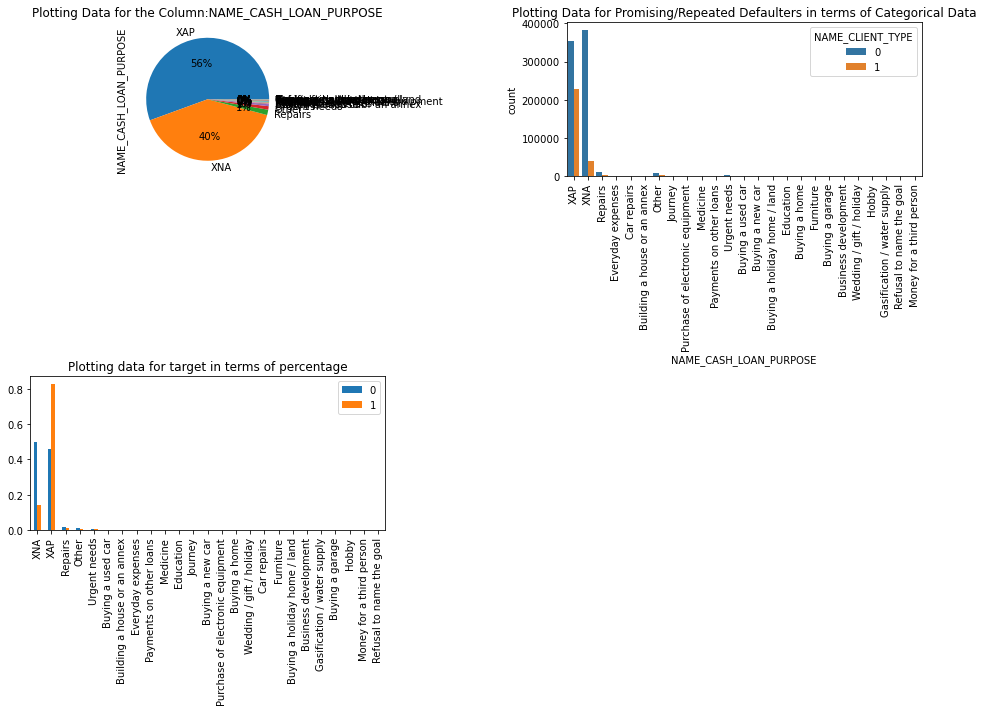

Plotting NAME_CONTRACT_STATUS


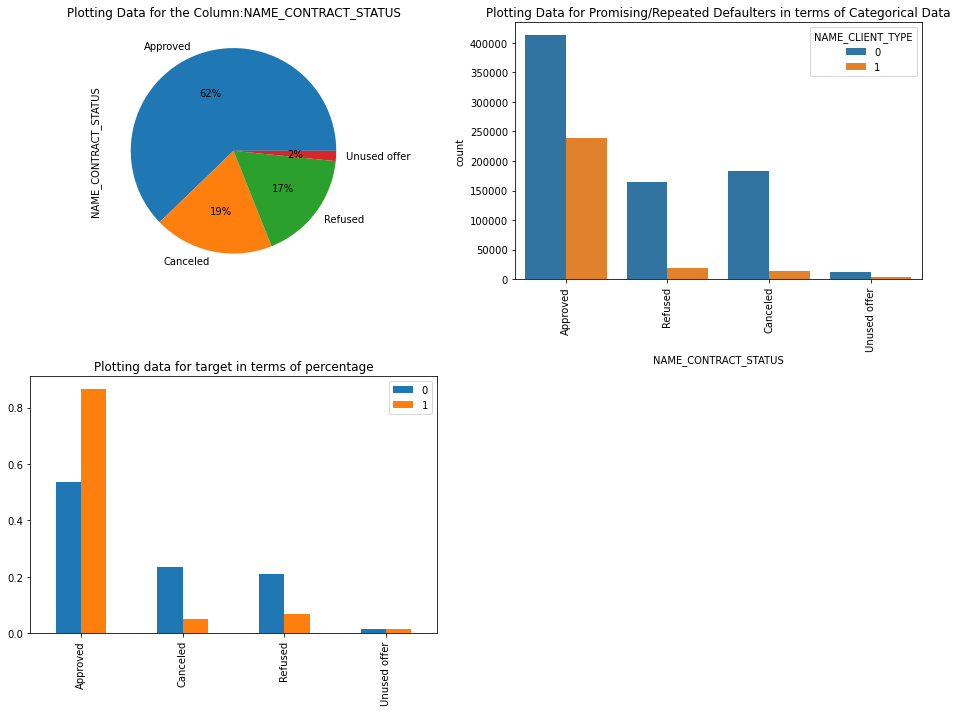

Plotting NAME_PAYMENT_TYPE


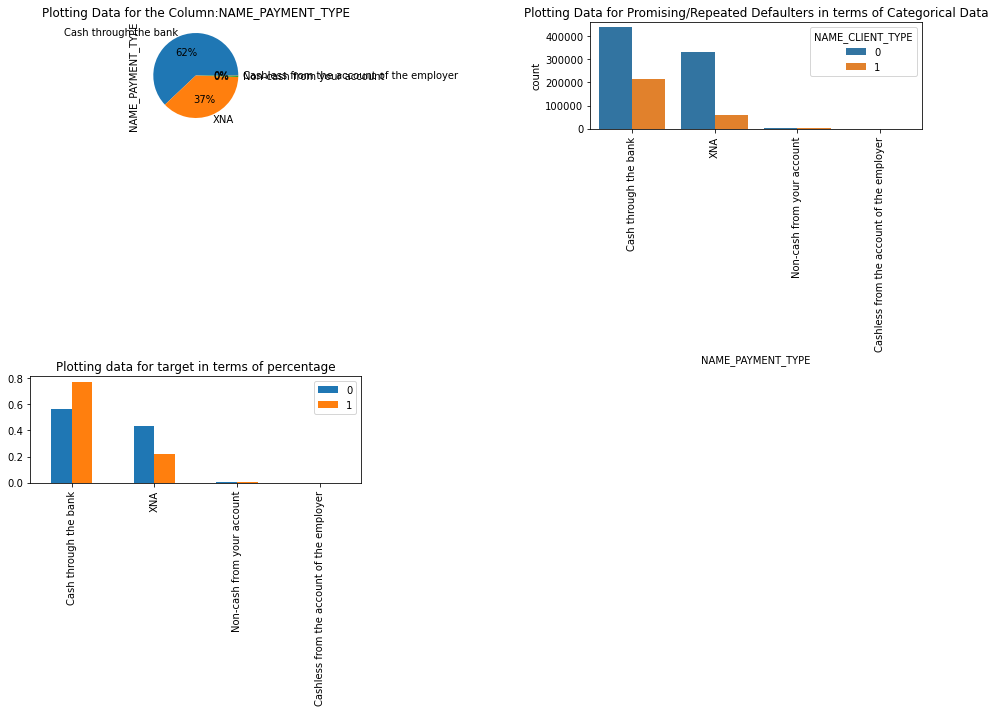

Plotting CODE_REJECT_REASON


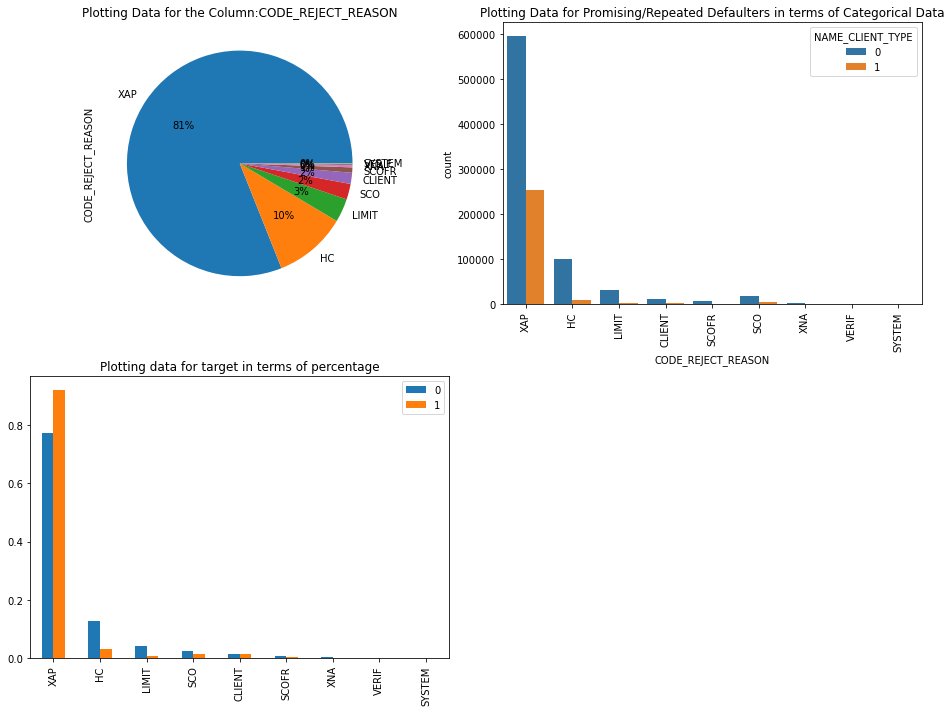

Plotting NAME_CLIENT_TYPE


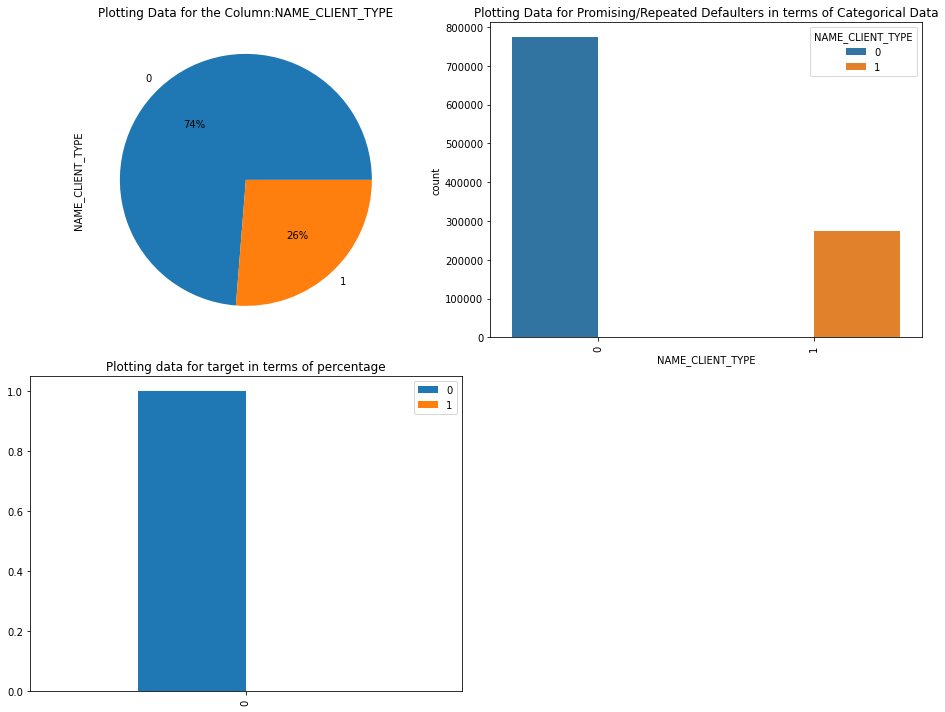

Plotting NAME_GOODS_CATEGORY


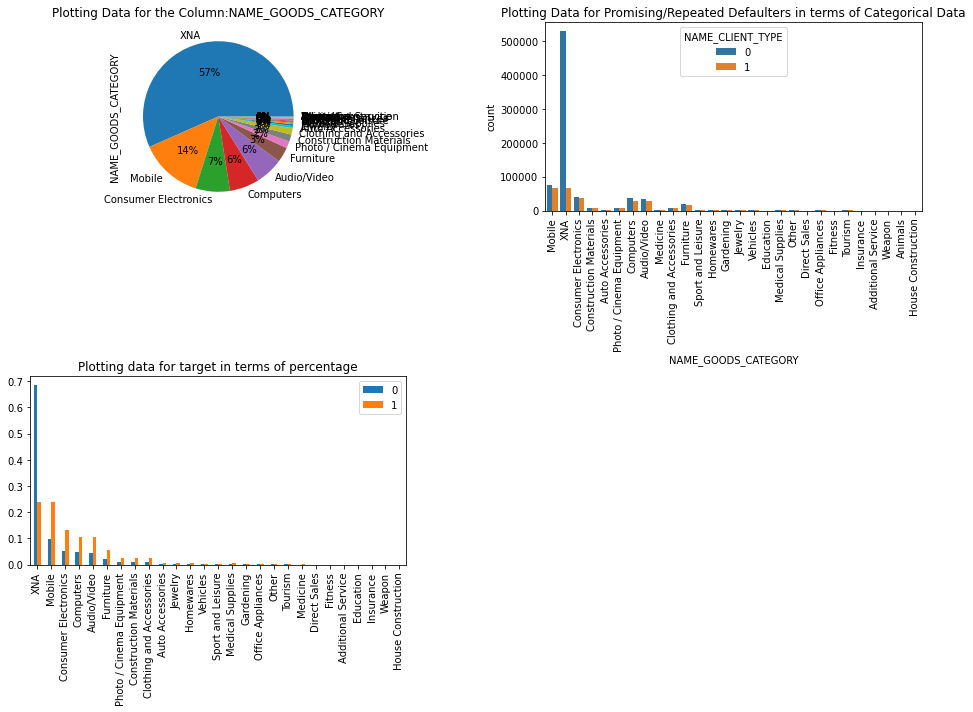

Plotting NAME_PORTFOLIO


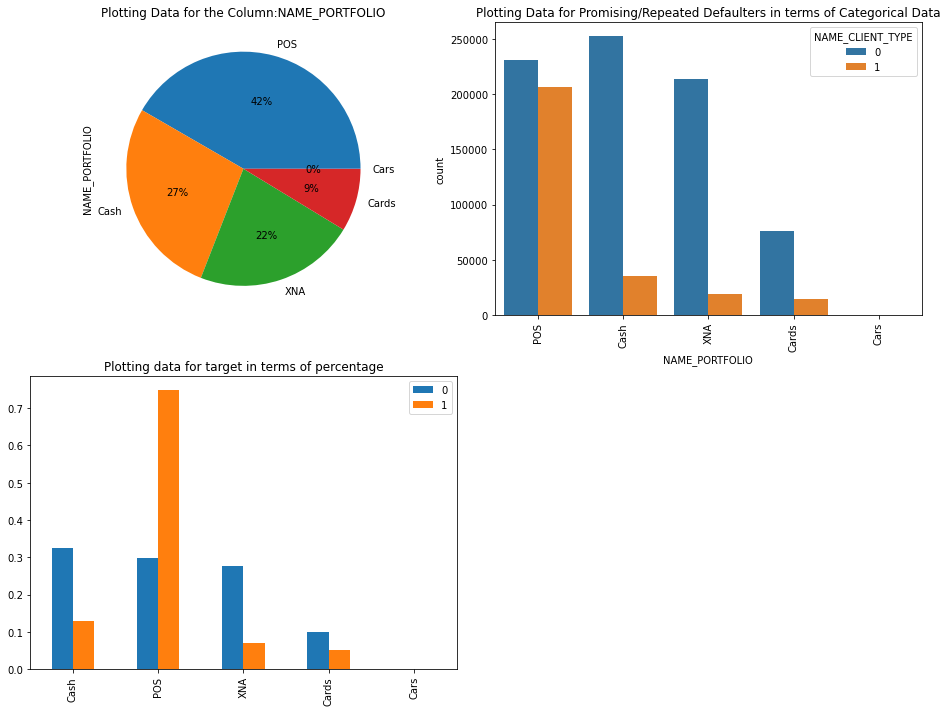

Plotting NAME_PRODUCT_TYPE


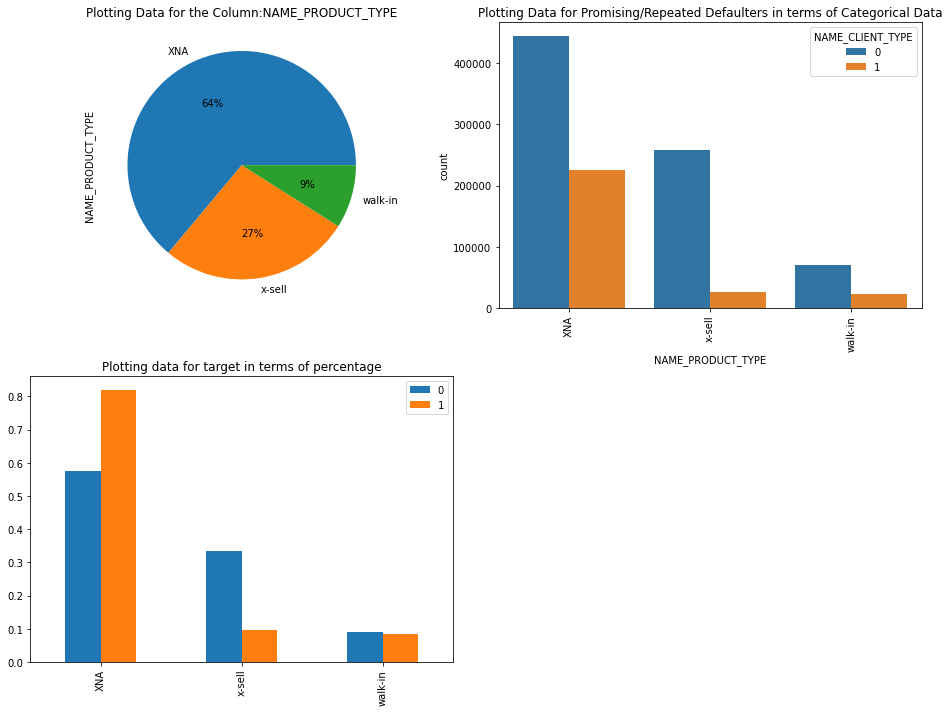

Plotting CHANNEL_TYPE


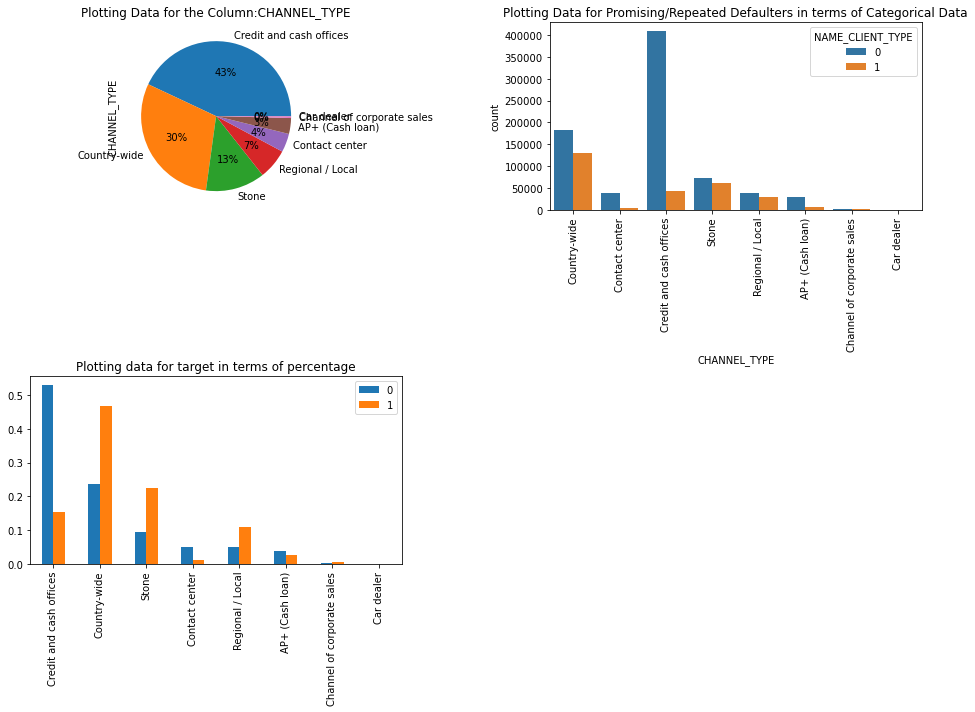

Plotting NAME_SELLER_INDUSTRY


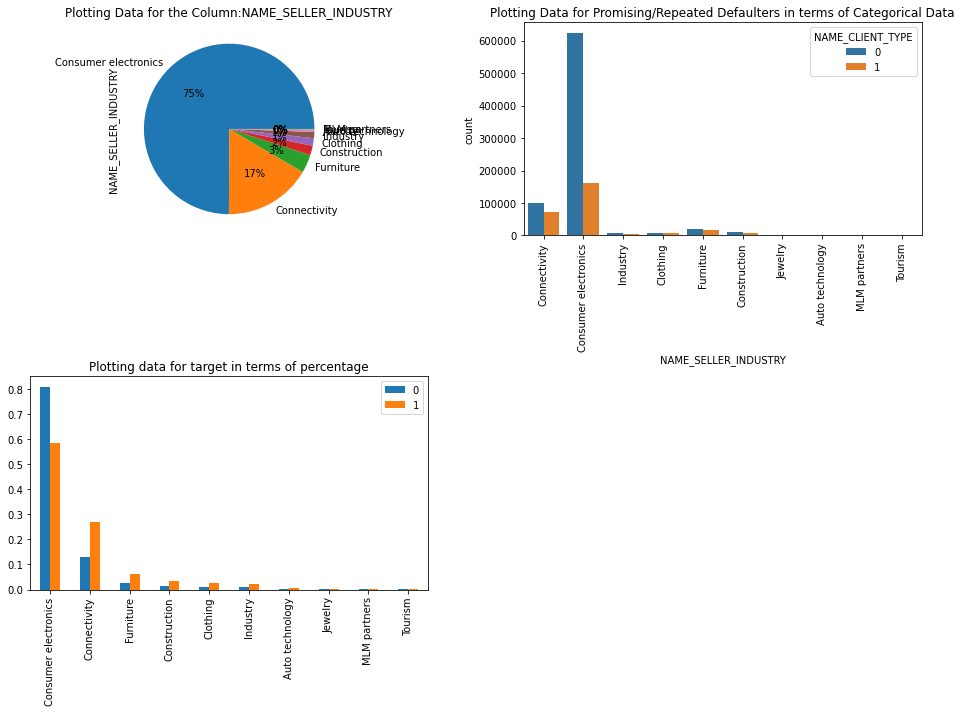

Plotting NAME_YIELD_GROUP


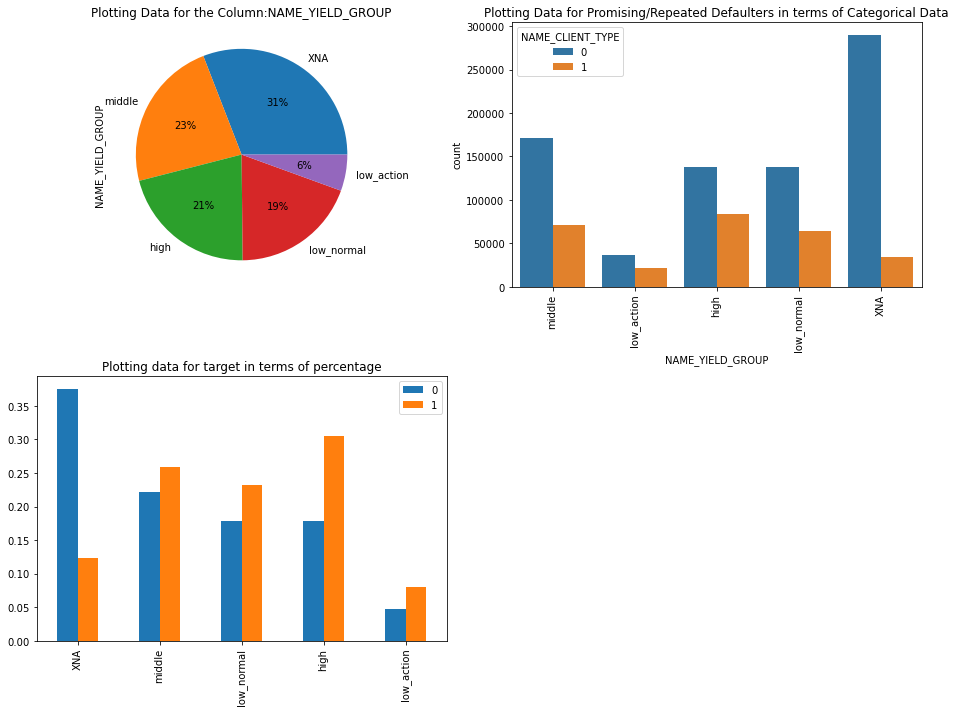

In [120]:
for column in df1_categorical:
    print("Plotting",column)
    plotting(df1,df1_0,df1_1, column)
    print("="*70)

# Numerical Columns

In [121]:
import numpy as np
corr=df1_0.corr() #Corelation plot
corr

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                     1.000000   -0.000279     0.006444   
SK_ID_CURR                    -0.000279    1.000000     0.000882   
AMT_ANNUITY                    0.006444    0.000882     1.000000   
AMT_APPLICATION               -0.000214    0.002317     0.773806   
AMT_CREDIT                    -0.000141    0.002312     0.778057   
AMT_GOODS_PRICE                0.009479    0.002265     0.810056   
HOUR_APPR_PROCESS_START       -0.002877    0.002421    -0.026680   
FLAG_LAST_APPL_PER_CONTRACT   -0.005588   -0.001315     0.029409   
NFLAG_LAST_APPL_IN_DAY        -0.003499   -0.000596     0.028557   
DAYS_DECISION                 -0.016202   -0.000748    -0.211681   
SELLERPLACE_AREA               0.000111    0.000229    -0.020947   
CNT_PAYMENT                    0.009782    0.000972     0.395667   
DAYS_FIRST_DRAWING             0.000613   -0.001363     0.067425   
DAYS_FIRST_DUE                -0.001923    0.001739    -0.061080   
DAYS_LAST_DUE_1ST_VERSION     -0.001357    0.001802    -0.085696   
DAYS_LAST_DUE                 -0.002530    0.002146     0.039715   
DAYS_TERMINATION              -0.002462    0.001886     0.022173   
NFLAG_INSURED_ON_APPROVAL     -0.003446   -0.000714     0.236942   

                             AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
SK_ID_PREV                         -0.000214   -0.000141         0.009479   
SK_ID_CURR                          0.002317    0.002312         0.002265   
AMT_ANNUITY                         0.773806    0.778057         0.810056   
AMT_APPLICATION                     1.000000    0.975981         0.946089   
AMT_CREDIT                          0.975981    1.000000         0.937564   
AMT_GOODS_PRICE                     0.946089    0.937564         1.000000   
HOUR_APPR_PROCESS_START            -0.010761   -0.015986        -0.032947   
FLAG_LAST_APPL_PER_CONTRACT         0.012018   -0.024194        -0.007504   
NFLAG_LAST_APPL_IN_DAY              0.007794   -0.022769        -0.006407   
DAYS_DECISION                      -0.101943   -0.092685        -0.219706   
SELLERPLACE_AREA                   -0.010443   -0.012611        -0.021025   
CNT_PAYMENT                         0.650170    0.637508         0.649037   
DAYS_FIRST_DRAWING                  0.065034   -0.007989        -0.003118   
DAYS_FIRST_DUE                     -0.043233   -0.010182        -0.028735   
DAYS_LAST_DUE_1ST_VERSION          -0.076140    0.008591        -0.006072   
DAYS_LAST_DUE                       0.094252    0.126087         0.108370   
DAYS_TERMINATION                    0.074392    0.116615         0.105152   
NFLAG_INSURED_ON_APPROVAL           0.175550    0.171407         0.148391   

                             HOUR_APPR_PROCESS_START  \
SK_ID_PREV                                 -0.002877   
SK_ID_CURR                                  0.002421   
AMT_ANNUITY                                -0.026680   
AMT_APPLICATION                            -0.010761   
AMT_CREDIT                                 -0.015986   
AMT_GOODS_PRICE                            -0.032947   
HOUR_APPR_PROCESS_START                     1.000000   
FLAG_LAST_APPL_PER_CONTRACT                 0.007570   
NFLAG_LAST_APPL_IN_DAY                      0.004781   
DAYS_DECISION                               0.037663   
SELLERPLACE_AREA                            0.018571   
CNT_PAYMENT                                -0.046058   
DAYS_FIRST_DRAWING                          0.002900   
DAYS_FIRST_DUE                              0.004992   
DAYS_LAST_DUE_1ST_VERSION                  -0.002729   
DAYS_LAST_DUE                              -0.004059   
DAYS_TERMINATION                           -0.003446   
NFLAG_INSURED_ON_APPROVAL                  -0.085646   

                             FLAG_LAST_APPL_PER_CONTRACT  \
SK_ID_PREV                                     -0.005588   
SK_ID_CURR                                     -0.001315   
AMT_ANNUITY                

In [122]:
mask=np.zeros_like(corr)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0

In [123]:
mask.shape

(18, 18)

In [124]:
mask[np.triu_indices_from(mask)]=True #Every value across the diagnol and above the diagnol is made 1 and rest all values are 0
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1.],
       [0., 0., 0., 0

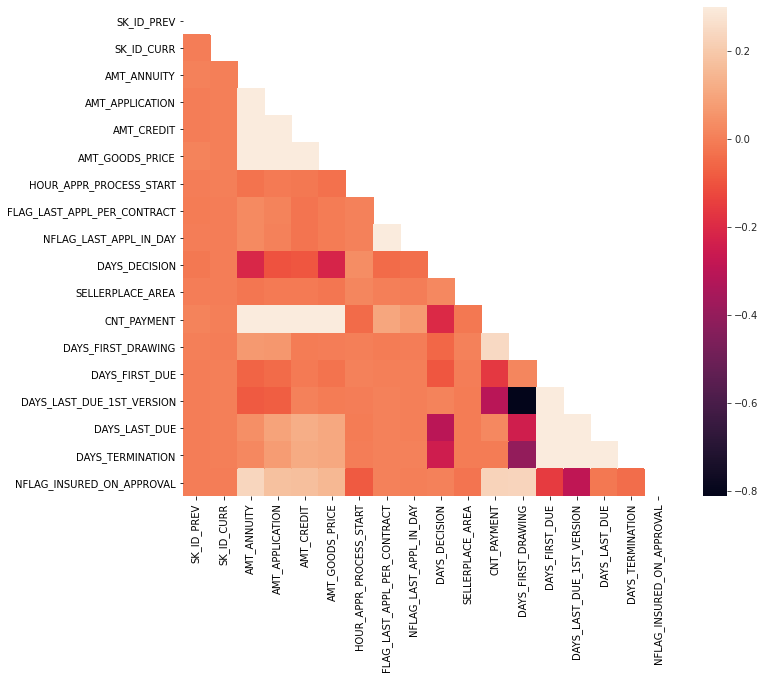

In [125]:
f, ax=plt.subplots(figsize=(11,9))
with sns.axes_style("white"):
    ax=sns.heatmap(corr,mask=mask, vmax=.3, square=True) #In the correlation matrix, the value that is there 1 will be masked.
    

### Find top 10 correlations

In [126]:
df1_0.corr().abs().unstack().sort_values(kind="quicksort").dropna() #Correlation matrix between df1_0 having repeater cleints and abs() gives only the positive values
#unstack() arranges all the values one below the other.
#Quicksort applied to sort all the obtained values.

SK_ID_PREV                 SELLERPLACE_AREA             0.000111
SELLERPLACE_AREA           SK_ID_PREV                   0.000111
AMT_CREDIT                 SK_ID_PREV                   0.000141
SK_ID_PREV                 AMT_CREDIT                   0.000141
                           AMT_APPLICATION              0.000214
                                                          ...   
DAYS_FIRST_DRAWING         DAYS_FIRST_DRAWING           1.000000
DAYS_FIRST_DUE             DAYS_FIRST_DUE               1.000000
DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE_1ST_VERSION    1.000000
NFLAG_LAST_APPL_IN_DAY     NFLAG_LAST_APPL_IN_DAY       1.000000
NFLAG_INSURED_ON_APPROVAL  NFLAG_INSURED_ON_APPROVAL    1.000000
Length: 324, dtype: float64

In [127]:
correlation_0=df1_0.corr().abs().unstack().sort_values(kind="quicksort").dropna()
correlation_0

SK_ID_PREV                 SELLERPLACE_AREA             0.000111
SELLERPLACE_AREA           SK_ID_PREV                   0.000111
AMT_CREDIT                 SK_ID_PREV                   0.000141
SK_ID_PREV                 AMT_CREDIT                   0.000141
                           AMT_APPLICATION              0.000214
                                                          ...   
DAYS_FIRST_DRAWING         DAYS_FIRST_DRAWING           1.000000
DAYS_FIRST_DUE             DAYS_FIRST_DUE               1.000000
DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE_1ST_VERSION    1.000000
NFLAG_LAST_APPL_IN_DAY     NFLAG_LAST_APPL_IN_DAY       1.000000
NFLAG_INSURED_ON_APPROVAL  NFLAG_INSURED_ON_APPROVAL    1.000000
Length: 324, dtype: float64

In [128]:
correlation_0=correlation_0[correlation_0!=1.0]
correlation_0

SK_ID_PREV        SELLERPLACE_AREA    0.000111
SELLERPLACE_AREA  SK_ID_PREV          0.000111
AMT_CREDIT        SK_ID_PREV          0.000141
SK_ID_PREV        AMT_CREDIT          0.000141
                  AMT_APPLICATION     0.000214
                                        ...   
AMT_GOODS_PRICE   AMT_CREDIT          0.937564
                  AMT_APPLICATION     0.946089
AMT_APPLICATION   AMT_GOODS_PRICE     0.946089
AMT_CREDIT        AMT_APPLICATION     0.975981
AMT_APPLICATION   AMT_CREDIT          0.975981
Length: 306, dtype: float64

In [129]:
correlation_0.sort_values(ascending=False).head(20)

AMT_APPLICATION              AMT_CREDIT                     0.975981
AMT_CREDIT                   AMT_APPLICATION                0.975981
AMT_APPLICATION              AMT_GOODS_PRICE                0.946089
AMT_GOODS_PRICE              AMT_APPLICATION                0.946089
                             AMT_CREDIT                     0.937564
AMT_CREDIT                   AMT_GOODS_PRICE                0.937564
DAYS_TERMINATION             DAYS_LAST_DUE                  0.917389
DAYS_LAST_DUE                DAYS_TERMINATION               0.917389
DAYS_LAST_DUE_1ST_VERSION    DAYS_FIRST_DRAWING             0.811527
DAYS_FIRST_DRAWING           DAYS_LAST_DUE_1ST_VERSION      0.811527
AMT_ANNUITY                  AMT_GOODS_PRICE                0.810056
AMT_GOODS_PRICE              AMT_ANNUITY                    0.810056
AMT_CREDIT                   AMT_ANNUITY                    0.778057
AMT_ANNUITY                  AMT_CREDIT                     0.778057
AMT_APPLICATION              AMT_A

### Top 10 Correlations-
1. AMT_APPLICATION              AMT_CREDIT                     0.975981
2. AMT_APPLICATION              AMT_GOODS_PRICE                0.946089     
3. AMT_CREDIT                   AMT_GOODS_PRICE                0.937564
4. DAYS_TERMINATION             DAYS_LAST_DUE                  0.917389
5. DAYS_LAST_DUE_1ST_VERSION    DAYS_FIRST_DRAWING             0.811527
6. AMT_ANNUITY                  AMT_GOODS_PRICE                0.810056
7. AMT_CREDIT                   AMT_ANNUITY                    0.778057
8. AMT_APPLICATION              AMT_ANNUITY                    0.773806
9. NFLAG_LAST_APPL_IN_DAY       FLAG_LAST_APPL_PER_CONTRACT    0.737945
10. AMT_APPLICATION              CNT_PAYMENT                    0.650170


## Analysing using a box plot

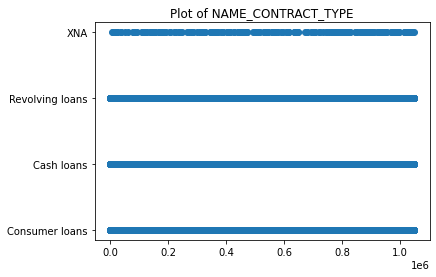

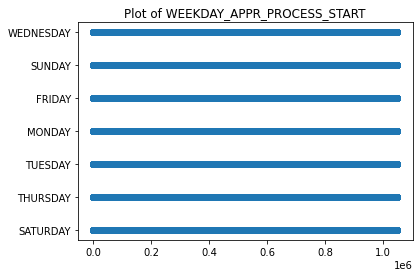

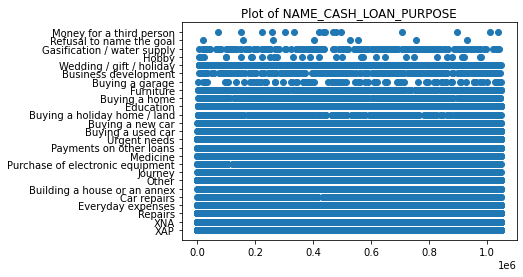

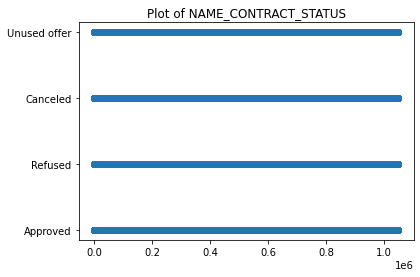

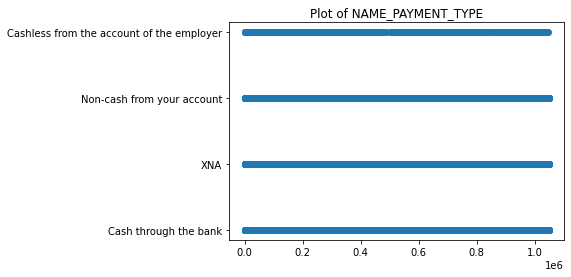

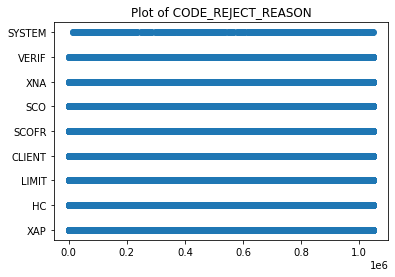

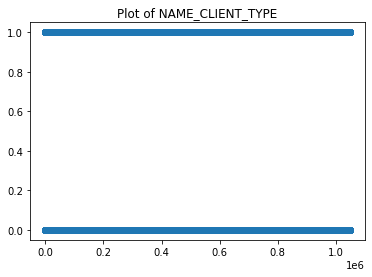

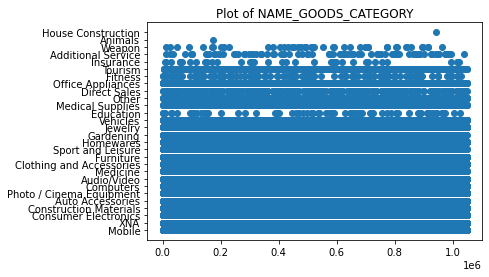

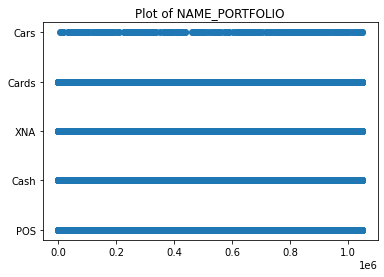

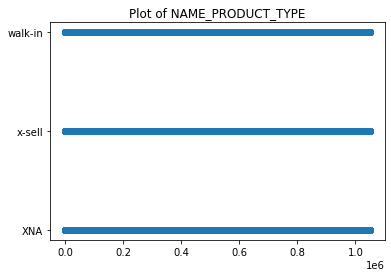

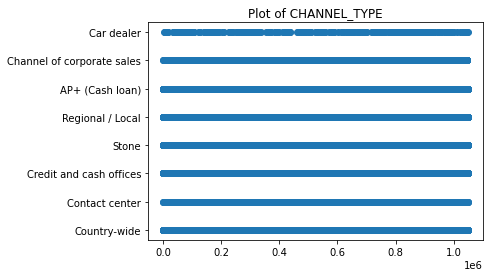

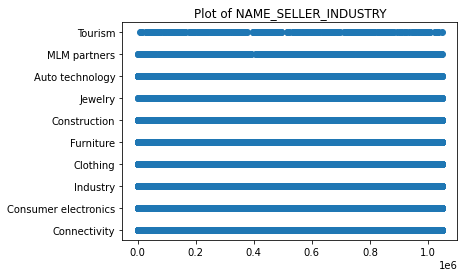

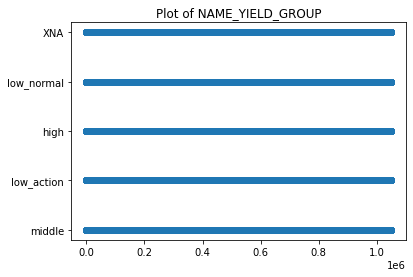

In [130]:
for column in df1_categorical:
    title="Plot of " +column
    plt.scatter(df1.index,df1[column])
    plt.title(title)
    plt.show()
    print("="*70)

# Analysis for Outliers

In [131]:
df1_numerical=df1.select_dtypes(include=['int64','float64']).columns
df1_numerical

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

# Univariate Analysis of Numeric Columns

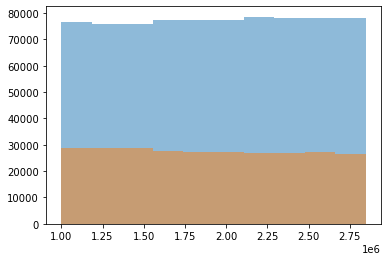

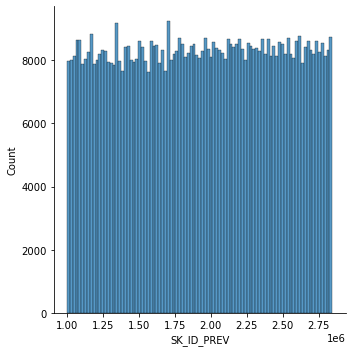

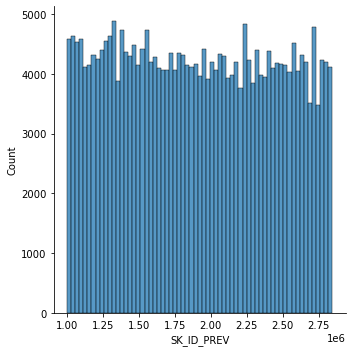

*************************************************)


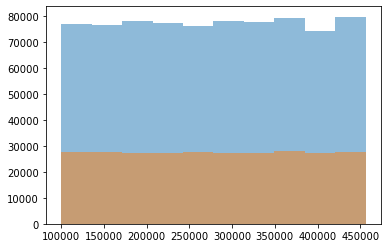

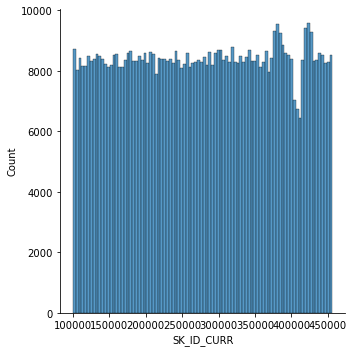

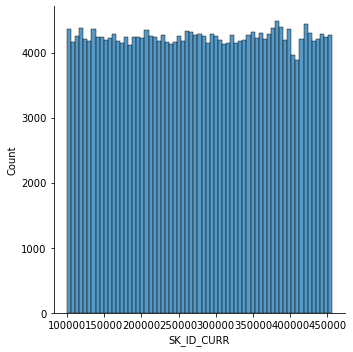

*************************************************)


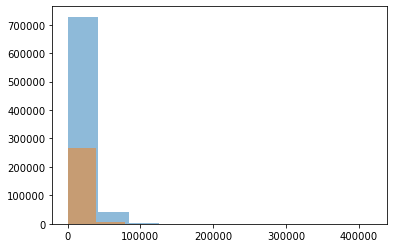

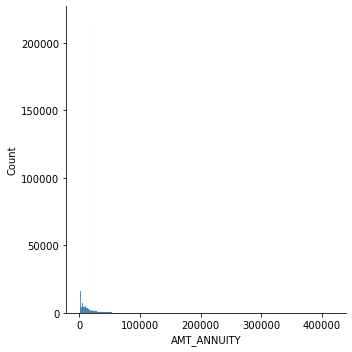

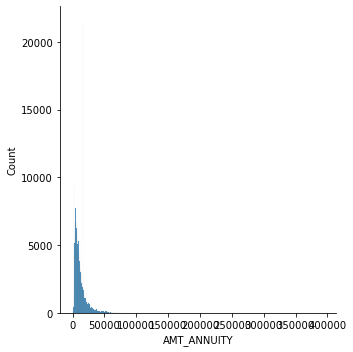

*************************************************)


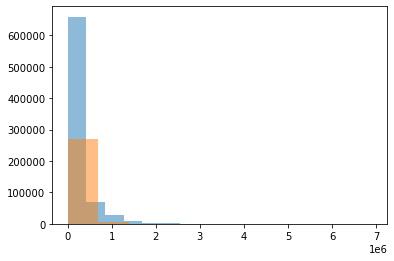

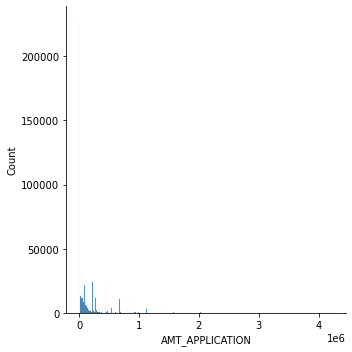

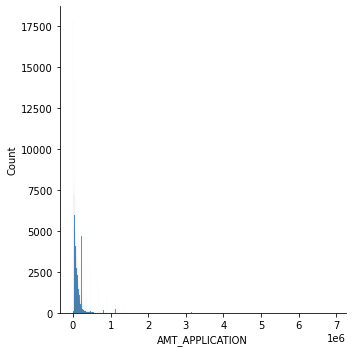

*************************************************)


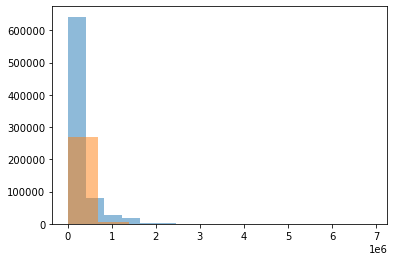

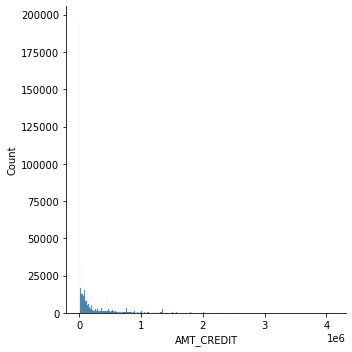

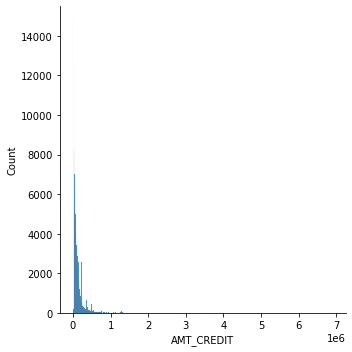

*************************************************)


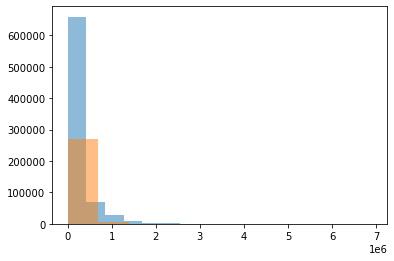

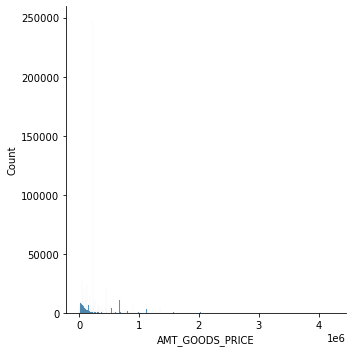

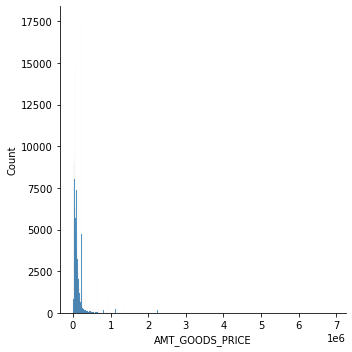

*************************************************)


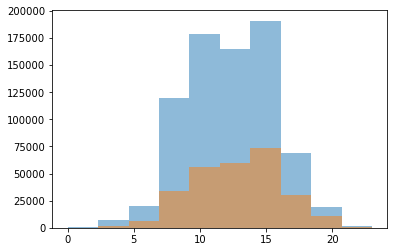

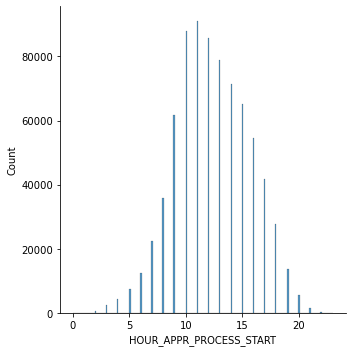

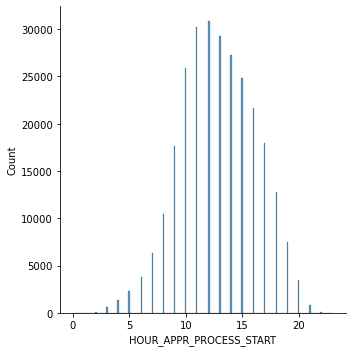

*************************************************)


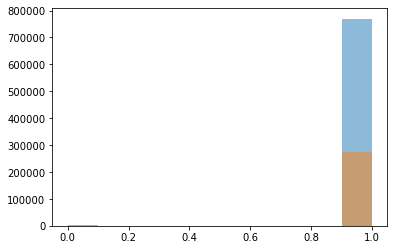

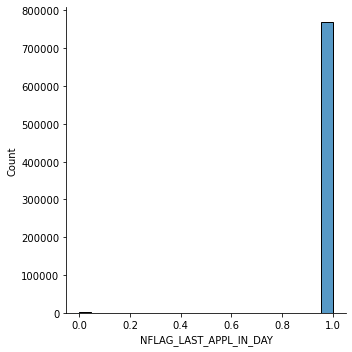

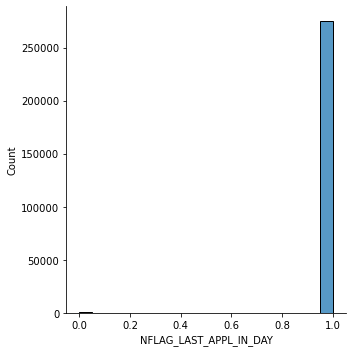

*************************************************)


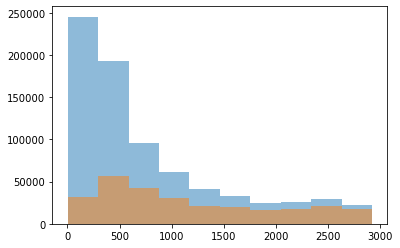

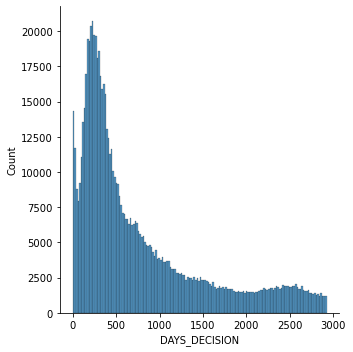

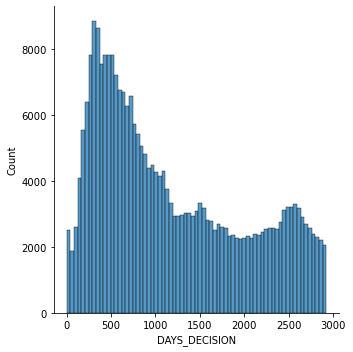

*************************************************)


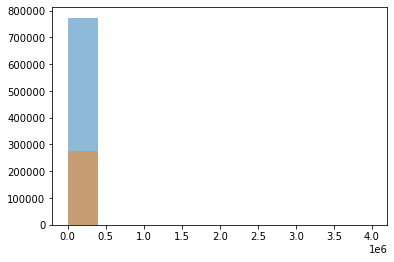

In [ ]:
#Histogram
for column in df1_numerical:
    plt.hist(df1_0[column],alpha=0.5,label='0')
    plt.hist(df1_1[column],alpha=0.5,label='1')
    plt.show()
    
    sns.displot(df1_0[column],label='0')
    sns.displot(df1_1[column],label='1')
    
    plt.show()
    print("*************************************************)")

# Reading Previous application

In [ ]:
#this dataset is too heavy for the jupyter to load. So, the memory out of bound message is displayed. Hence, I am not considering the previous_application.
#However, There are duplicates SK_ID as a person could have taken load multiple times
df2=pd.read_csv("previous_application.csv") 
df2.head()

In [ ]:
#df2.shape

#

### DATA INSIGHTS


1. The New and Refreshed clients are applying for consumer loans while the repeaters loan application is in cash. Hence, the consumer loans must be preferred by the company to avoid default patterns by repeaters.
2. The same pattern of cash loans are inclined towards the defaulters while the new and the refreshed client are preferring consumer loans to some extent. However, the consumer loans are also targeted by defaulter by less number. 
3. The consumer loads for new and refreshed clients are to be targeted for enhanced profit for the company in comparison to granting cash loads. 
4. There is a mixed view about the day of the week when the load is applied. However, the defaulters are applying load maximum in the weekdays while the new and refreshed clients are applying it on weekends. Hence, we can infer the ones who are working and are promising clients will be coming for their loan application on weekends.
5. There are high repeater cases in all the days as compared to the new and the refreshed client cases. Hence, the company needs to be careful with the fraudsters as everyday the chances of fraud are high as compared to the legitimate clients.
6. The percentage of high load default repeaters is high for the weekends. Whereas the legitimate ones target the weekdays/ working days to apply for loans. 
7. 62% of the applied application by the repeaters are approved. However, the 19% of the applications by new/refreshed clients are cancelled. This is important for the company to note the Non Performing Asset possibility and the financial burden on the company’s account if the present situation is not adhered to. 
8. The Approved defaulters are 60% higher than the new and refreshed clients. The possibility of clients of committing defaults is increased in case their high numbers are sanctioned by the credit company. Hence, the company is required to be careful as they might land up in bad loans resulting in NPS s soon. 
9. The bank while selecting the client to approve the load suggests that are taking the right measures to filter the promising clients as the maximum new and refreshed clients are granted the loads and the approval for defaulters is much less. 
10. Loan default repeaters are majorly paying cash through the bank as there is a strong possibility that they are working using black money. 
11. The repeater defaulters are applying the loans for mobile phones. The other popular products for the load application are the consumer electronics, construction materials, computers, furniture, clothing and accessories and phot/cinema equipments. These are the loan category which require special attention and scrutiny for approving the loan application. 
12. The chart is evident that the repeated defaulters are dealing with cash for payments to the credit company. Hence, the company can follow strict no cash and only UPI/digital payment methods to approve the loan applications for maximizing its profit and filtering the defaulters paying using the black/unauthorized money 
13. Consumer electronics are applied for loan application by repeated defaulters and hence, their files are required to go under extra layer of scrutiny to avoid any approval for a potential defaulter.
14. Consumer electronics, connectivity, furniture, construction, clothing, industry, auto technology are most popular loan application areas. 
15. The new and refreshed client loan applications are majorly medium rate of interest of the previous application.
16. The heatmap is a visual representation of the loan applications from defaulters and the new and refreshed clients. 
i. DAYS_FIRST_DRAWING(Relative to application date of current application when was the first disbursement of the previous application) and the DAYS_LAST_DUE_1ST_VERSION(Relative to application date of current application when was the first due of the previous application) have the highest relation.
ii. These dues are highly relatable to consider a loan application promising or defaulter for the credit loan company.
17. The credit amount for the loan application are 24000 INR and 7000 INR for promising new and refreshed loan applications and the repeater clients respectively. 
18. The histogram gives the days for decision to the approval of loan application as 20000 and 8000 maximum for the promising new and refreshed clients and defaulters/repeaters respectively indicating the loan application undergoes scrutiny for the promising clients for much more number of days as compared to the defaulter clients. Their perfect paper work needs to be handled cautiously as in real life the loan procedures take much more number of days. 

### THANK YOU